<Figure size 640x480 with 0 Axes>

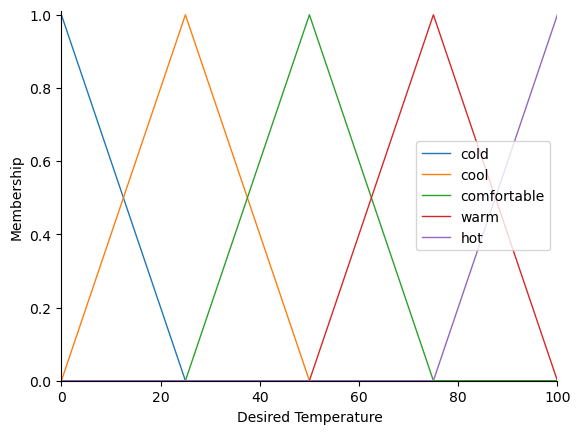

<Figure size 640x480 with 0 Axes>

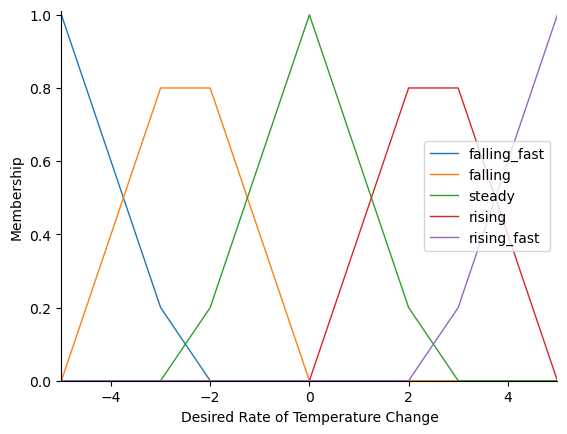

<Figure size 640x480 with 0 Axes>

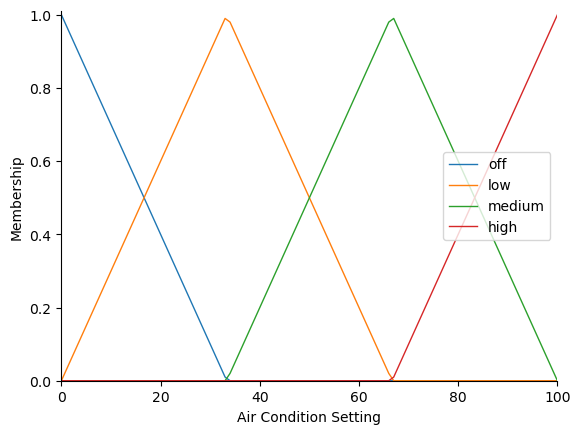

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Create fuzzy variables / Universe of Discourse
desired_temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'Desired Temperature')
rate_of_change = ctrl.Antecedent(np.arange(-5, 6, 1), 'Desired Rate of Temperature Change')
ac_setting = ctrl.Consequent(np.arange(0, 101, 1), 'Air Condition Setting')

# Define linguistic terms and membership functions
desired_temperature.automf(5, names=['cold', 'cool', 'comfortable', 'warm', 'hot']) #automatically generates membership functions
rate_of_change.automf(5, names=['falling_fast', 'falling', 'steady', 'rising', 'rising_fast'])
ac_setting.automf(4, names=['off', 'low', 'medium', 'high'])

# Define rules
rule1 = ctrl.Rule(desired_temperature['cold'] | rate_of_change['falling_fast'], ac_setting['high'])
rule2 = ctrl.Rule(desired_temperature['cool'] | rate_of_change['falling'], ac_setting['medium'])
rule3 = ctrl.Rule(desired_temperature['comfortable'] & rate_of_change['steady'], ac_setting['medium'])
rule4 = ctrl.Rule(desired_temperature['warm'] | rate_of_change['rising'], ac_setting['low'])
rule5 = ctrl.Rule(desired_temperature['hot'] | rate_of_change['rising_fast'], ac_setting['off'])

# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
ac_ctrl_simulation = ctrl.ControlSystemSimulation(ac_ctrl)

# View the fuzzy membership functions in separate figures
plt.figure()
desired_temperature.view() #to display graph
plt.legend(loc = 'center right')

plt.figure()
rate_of_change.view()
plt.legend(loc = 'center right')
plt.show()

plt.figure()
ac_setting.view()
plt.legend(loc = 'center right')
plt.show()



In [8]:
# Get user input for temperature and rate of change
desired_temperature_input = float(input("Enter Temperature (0-100): "))
rate_of_change_input = float(input("Enter Rate of Temperature Change (-5 to 5): "))

# Simulate the system with user input
ac_ctrl_simulation.input['Desired Temperature'] = desired_temperature_input
ac_ctrl_simulation.input['Desired Rate of Temperature Change'] = rate_of_change_input

# Compute the output / to defuzzify and have a crisp value
ac_ctrl_simulation.compute()



Enter Temperature (0-100): 16
Enter Rate of Temperature Change (-5 to 5): 0


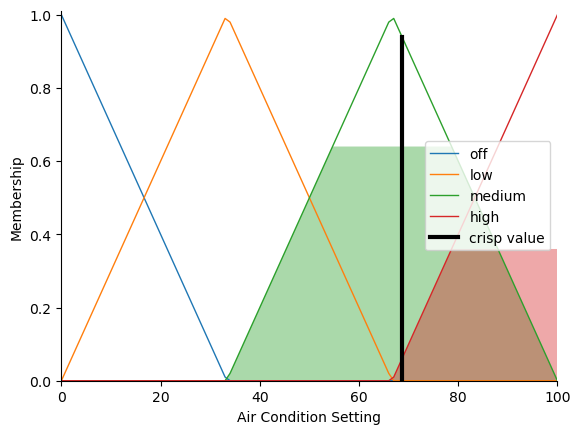

Air Conditioner Setting: 68.69540373261104
Action to Take: Turn the air conditioner to HIGH.


In [9]:
# Show the simulation plot
ac_ctrl_simulation.input['Desired Temperature'] = desired_temperature_input  # Reset input for simulation plot
ac_ctrl_simulation.input['Desired Rate of Temperature Change'] = rate_of_change_input
ac_setting.view(sim=ac_ctrl_simulation)
plt.legend(loc = 'center right')
plt.show()

# Print the output
print("Air Conditioner Setting:", ac_ctrl_simulation.output['Air Condition Setting'])

# Determine the action based on the air conditioner setting
ac_setting_value = ac_ctrl_simulation.output['Air Condition Setting']
if ac_setting_value >= 50:
    action = "Turn the air conditioner to HIGH."
elif ac_setting_value >= 25:
    action = "Set the air conditioner to LOW."
else:
    action = "Turn the air conditioner OFF."

# Print the action to take
print("Action to Take:", action)